<a href="https://colab.research.google.com/github/karthikeyanthanigai/Multiple-linear-regression-for-car-price-prediction/blob/master/Multiple_linear_reg_for_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

![alt text](https://wallpaperhd.wiki/wp-content/uploads/hd-backgrounds-download-for-picsart-wallpaper.wiki-white-audi-a5-background-pic-wpc0010868.jpg)


In [2]:
# Importing the dataset
dataset = pd.read_csv('car.csv')
#this function will provide the descriptive statistics of the dataset.(only int value)
dataset.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


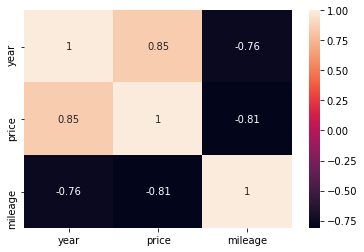

In [3]:
import seaborn as sns
#Other methods like Back Propagation/ Forward Propagation can be used. But Correlation Matrix is best for most speedy analysis.
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
dataset.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


here we are predicitng the price(dependent variable) of a car and we are taking year,model,mileage,transmission as independent variables!

In [0]:
#determine X and y variables(for correlation matrix this values is taken as independent variables)
X = dataset.iloc[:, [0,1,3,5]].values
y = dataset.iloc[:, [2]].values

In [0]:
#label encoding for character data
from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
X[:, 1] = labelencoder1.fit_transform(X[:, 1])
labelencoder2 = LabelEncoder()
X[:, -1] = labelencoder2.fit_transform(X[:, -1])

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [0]:
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [8]:
#ols
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#predicting the value
y_pred1= lin_reg.predict(X_test)

#r2_score result
from sklearn.metrics import r2_score, mean_squared_error
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using ols method = ",r_squared1)

Coefficient of Determination using ols method =  0.725781783369461


In [9]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-3)
regressor.fit(X_train, y_train)

#predicting the value
y_pred = regressor.predict(X_test)

#r2_score result
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination using sgd method = ",r_squared)

Coefficient of Determination using sgd method =  0.7266754207444466


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
